# TODO
- #TODO: Run locally
- #TODO: Train commaAI
- #TODO: WEIGHTNING BERÜCKSICHTIGEN -> anders gelöst
- #TODO: Remove no steering
- #TODO: Balancing, less complexity, 
- #TODO: Quality fastest
- #TODO TRAIN WORKING MODEL!!!!

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import self_driving_car
from self_driving_car import data_generator
from imp import reload
%matplotlib inline

In [2]:
reload(self_driving_car.data_generator)
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset1_udacity")
#datagen.add_dataset("dataset2_twe_one_lap")
#datagen.add_dataset("dataset3_ssz_one_lap")
##datagen.auto_prepare();
datagen.shuffle()
datagen.split()
#datagen.smooth_steering(window=60); # <<<<<<<< das ist gut -- ne
# DAS WAR GUT:
datagen.filter_data_not_moving()
#datagen.filter_data_low_steering(low_steering_threshold = 0.05, low_steering_remove_prop = 0.75)
#datagen.correct_camera_steering(0.03)
##datagen.filter_data_low_steering(low_steering_threshold = 0.04, low_steering_remove_prop = 0.4+0.1)
##datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.5+0.1)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.3)
#datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.6+0.1) #raus?
#datagen.correct_camera_steering(0.05)
#datagen.filter_data_low_steering(low_steering_threshold = 0.10, low_steering_remove_prop = 0.30) # NEW?
datagen.filter_data_low_steering(low_steering_threshold = 0.02, low_steering_remove_prop = 0.85) # <
#datagen.filter_data_low_steering(low_steering_threshold = 0.03, low_steering_remove_prop = 0.85) # NEU (x2)
#datagen.correct_camera_steering(0.08)
datagen.correct_camera_steering(0.18)
#datagen.deactivate_mod('mod_blur')
#datagen.deactivate_mod('mod_shadow')

shuffled data
split data into 108486 training sample and 12054 validation samples
5430 samples removed due to speed < 10.000000
54602 samples randomly removed due to steering < 0.020000
steering angle corrected by +/- 0.180000


In [3]:
print("Number of samples:           ", datagen.num_of_samples('all'))
print("Numver of training samples:  ", datagen.num_of_samples('train'))
print("Number of validation samples:", datagen.num_of_samples('valid'))

Number of samples:            60508
Numver of training samples:   54519
Number of validation samples: 5989


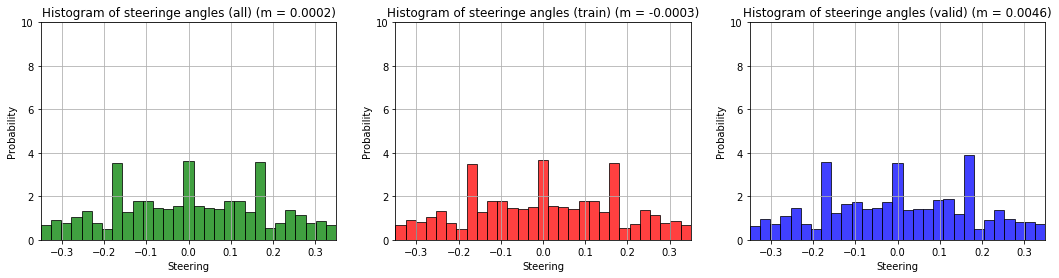

In [ ]:
x1 = datagen.data['steering'].values
#x1 = datagen.data[datagen.data['filter'] == 'mod_identity']['steering'].values
x2 = datagen.data[datagen.data['is_train'] == True]['steering'].values
x3 = datagen.data[datagen.data['is_valid'] == True]['steering'].values

# the histogram of the data
fig = plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title(r'Histogram of steeringe angles (all) (m = %.4f)' % np.mean(x1)); plt.grid(zorder=0)
n, bins, patches = plt.hist(x1, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='green', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,2)
plt.title(r'Histogram of steeringe angles (train) (m = %.4f)' % np.mean(x2)); plt.grid(True);
n, bins, patches = plt.hist(x2, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='red', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10));
plt.subplot(1,3,3)
plt.title(r'Histogram of steeringe angles (valid) (m = %.4f)' % np.mean(x3)); plt.grid(True)
n, bins, patches = plt.hist(x3, 29, range=[-0.35, 0.35], normed=1, edgecolor='black', facecolor='blue', alpha=0.75)
plt.xlabel('Steering'); plt.ylabel('Probability')
plt.xlim((-0.35,0.35)); plt.ylim((0,10)); 
plt.show()

In [ ]:
from self_driving_car import model
reload(self_driving_car)
reload(self_driving_car.model)
if True:
    model = self_driving_car.model.SDRegressionModel("simple")
#    model.load_weights('/mnt/models/simple/')    
    model.train_generator(datagen, "20170209_T_nosmooth_eps18", nb_epoch = 40, samples_per_epoch = 19200/2)
else:
    model = self_driving_car.model.SDRegressionModel("commaAI_modified")
    model.train_generator(datagen, "20170209_D", nb_epoch = 5, samples_per_epoch = 11000)

Using TensorFlow backend.


Instructions for updating:
Please switch to tf.summary.merge_all.
Epoch 1/40
9600/9600 [==============================] - 81s - loss: 0.0483 - val_loss: 0.0452
Epoch 2/40
9600/9600 [==============================] - 79s - loss: 0.0416 - val_loss: 0.0408
Epoch 3/40
9600/9600 [==============================] - 79s - loss: 0.0406 - val_loss: 0.0375
Epoch 4/40
9600/9600 [==============================] - 78s - loss: 0.0351 - val_loss: 0.0351
Epoch 5/40
9600/9600 [==============================] - 78s - loss: 0.0342 - val_loss: 0.0332
Epoch 6/40
9600/9600 [==============================] - 79s - loss: 0.0315 - val_loss: 0.0301
Epoch 7/40
9600/9600 [==============================] - 78s - loss: 0.0298 - val_loss: 0.0286
Epoch 8/40
9600/9600 [==============================] - 79s - loss: 0.0277 - val_loss: 0.0282
Epoch 9/40
9600/9600 [==============================] - 78s - loss: 0.0276 - val_loss: 0.0273
Epoch 10/40
9600/9600 [==============================] - 78s - loss: 0.0268 - val_loss: 

In [ ]:
datagen.data

## We do not need accuracy for regression task, only loss

SLACK: Accuracy is not a valid metric in this task because it's not a classification, but rather a regression... 
Accuracy is how many classes you predicted correctly in the batch.  Here we're trying to come up with a continuous number between `+1` to `-1`.  So remove `accuracy` from the metrics list of `model.compile` (edited)
So validation loss is all that's important here.  Secondly: If the car isn't moving, that's usually do to an error in the `model.predict` and keras is not very good at saying what happened

In [ ]:
history = model._history
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel('#epoch'); plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [ ]:
import pydot_ng
from keras.utils.visualize_util import plot
model.model.summary()
plot(model.model, to_file=('doc/images/model_%s.png' % model.modelname))

# Simple
![A](./doc/images/model_simple.png)
# CommaAI
![B](./doc/images/model_commaAI.png)
# CommaAI_modified
![C](./doc/images/model_commaAI_modified.png)

In [7]:
datagen = self_driving_car.data_generator.DataGenerator()
datagen.add_dataset("dataset4_beta_sim")
len(datagen.data)/(3*5)

2513.0